In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import os

import matplotlib.pyplot as plt

In [7]:
bb_data = pd.read_csv('data/bb_data_cleaned.csv')

In [8]:
bb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1188 entries, 0 to 1187
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         1187 non-null   object 
 1   Player Name  1188 non-null   object 
 2   School       1184 non-null   object 
 3   Pos          871 non-null    object 
 4   Allstar/BT   654 non-null    object 
 5   G            1188 non-null   int64  
 6   AB           1188 non-null   int64  
 7   R            1188 non-null   int64  
 8   H            1188 non-null   int64  
 9   2B           1188 non-null   int64  
 10  3B           1188 non-null   int64  
 11  HR           1188 non-null   int64  
 12  RBI          1188 non-null   int64  
 13  SB           1188 non-null   int64  
 14  CS           1188 non-null   int64  
 15  BB           1188 non-null   int64  
 16  SO           1188 non-null   int64  
 17  SH           1188 non-null   int64  
 18  SF           1188 non-null   int64  
 19  GDP   

In [9]:
bb_data.head()

,Year,Player Name,School,Pos,Allstar/BT,G,AB,R,H,2B,...,BB,SO,SH,SF,GDP,AVG,OBP,SLG,OPS,XBH
0,2003-2006,Aaron Bates,NC State,1B,N,167,602,154,220,44,...,95,79,13,7,20,0.365,0.478,0.561,1.039,69.0
1,2002-2003,Aaron Hill,LSU,2B,N,124,487,114,168,45,...,67,41,4,7,14,0.345,0.434,0.573,1.007,69.0
2,2011-2013,Aaron Judge,Fresno State,OF,Y,169,594,130,205,41,...,108,137,3,3,18,0.345,0.451,0.529,0.980,66.0
3,2008-2010,Adam Eaton,Miami,CF-LF,N,158,621,169,211,45,...,59,87,11,4,6,0.340,0.441,0.586,1.027,87.0
4,2011-2013,Adam Engel,Louisville,OF,N,169,604,121,160,15,...,63,84,20,6,8,0.265,0.362,0.306,0.668,19.0


In [12]:
AS_data = bb_data.groupby('Allstar/BT')[['R','H','HR','RBI','AVG','OBP','SLG', 'OPS','XBH']].mean()

In [14]:
AS_data.reset_index(level=0, inplace = True)
AS_data.head()

,Allstar/BT,R,H,HR,RBI,AVG,OBP,SLG,OPS,XBH
0,N,114.951641,175.540587,17.492228,105.953368,0.321843,0.406458,0.499677,0.906121,56.651123
1,Y,135.426667,199.213333,22.973333,126.106667,0.346600,0.435693,0.554640,0.990293,67.293333


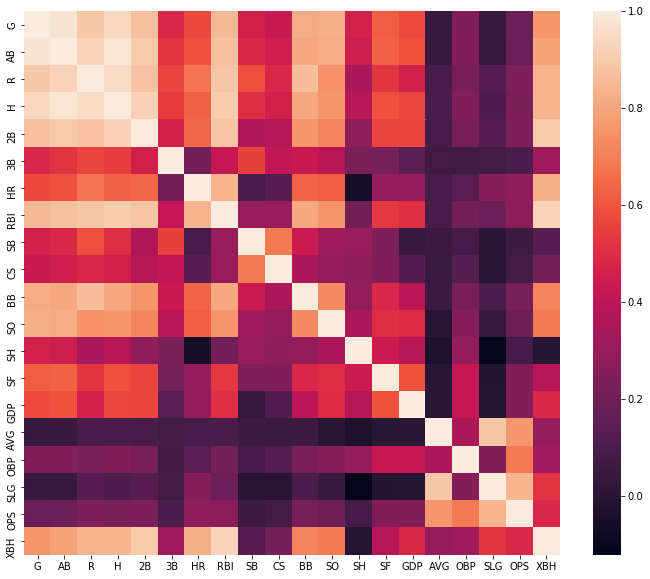

In [16]:
plt.subplots(figsize=(12,10))
sns.heatmap(bb_data.corr());